/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


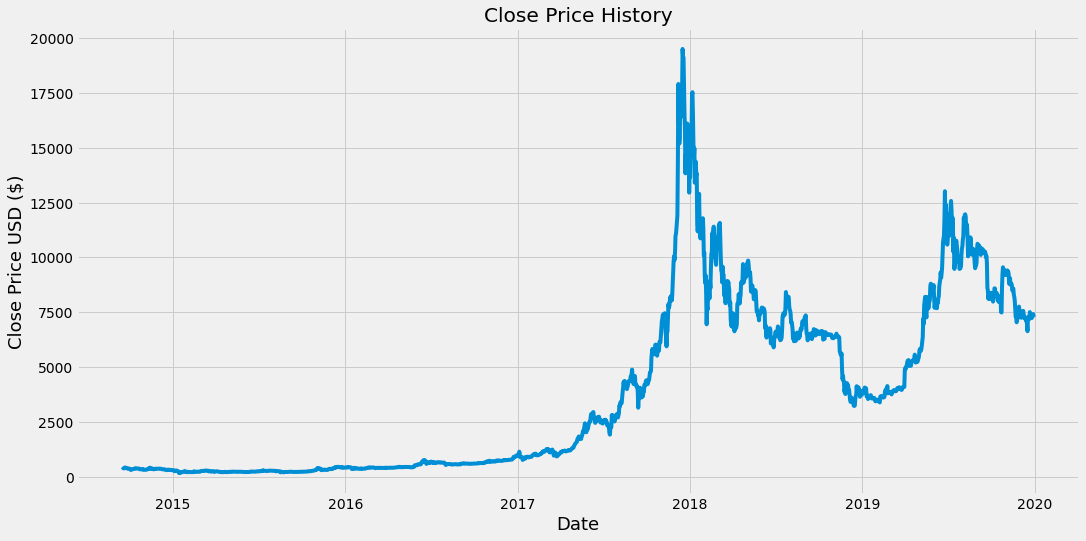

[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481,
       0.01146092, 0.01030462, 0.0102159 , 0.01080997, 0.01063765,
       0.01019545, 0.00939004, 0.00780375, 0.00737123, 0.00786654,
       0.0081827 , 0.00904986, 0.00967546, 0.00949615, 0.0095343 ,
       0.01037543, 0.01098958, 0.0115308 , 0.01121521, 0.01058284,
       0.01064506, 0.01104279, 0.01094465, 0.0105978 , 0.01078569,
       0.010614  , 0.00933336, 0.00932964, 0.00875643, 0.00914117,
       0.0090524 , 0.00929201, 0.00815185, 0.00865466, 0.00829316,
       0.00764241, 0.00764981, 0.00773584, 0.00788792, 0.00835346,
       0.00886093, 0.00850507, 0.00866414, 0.00958425, 0.0097737 ,
       0.00981361, 0.01270533, 0.01255905, 0.01137283, 0.01025037])]
[0.010858520753790677]

[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481,
       0.01146092, 0.01030462, 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


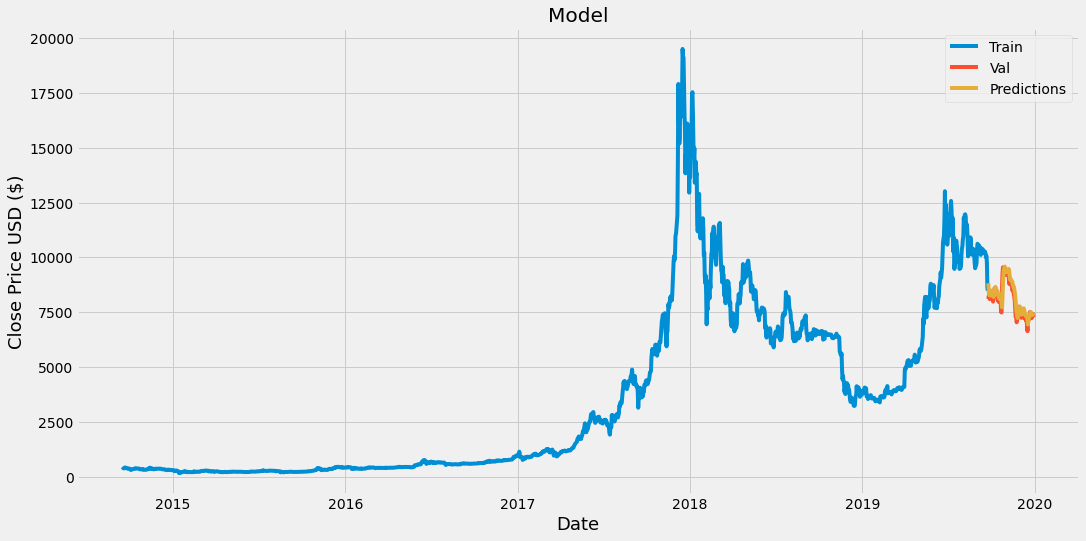

,Close,Predictions
Date,,
2019-09-25,8118.967773,8826.075195
2019-09-26,8251.845703,8418.228516
2019-09-27,8245.915039,8296.255859
2019-09-28,8104.185547,8295.878906
2019-09-29,8293.868164,8261.894531
...,...,...
2019-12-26,7238.966797,7437.954590
2019-12-27,7290.088379,7387.221191
2019-12-28,7317.990234,7383.597656


In [ ]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
currentDate="2019-12-29"
#Set the Ticker
ticker="BTC-USD"

#Get the stock quote
df = web.DataReader(ticker, data_source='yahoo', start='2010-01-01', end=currentDate)
#Show teh data
df

#Get the number of rows and columns in the data set
df.shape

#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .95 )

training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0]) # --i:i volt
  if i<= 61:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
#model.add(Dense(25)) # orig
model.add(Dense(45))

model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model
print(x_train)
print(y_train)
model.fit(x_train, y_train, batch_size=1, epochs=3)



#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()




#Show the valid and predicted prices
valid





In [ ]:
currentDate="2020-08-21"

#Get the quote
apple_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end=currentDate)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
print(scaler.data_max_)

X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
X_calculated=[]


for i in range(5):
  
  #Convert the X_test data set to a numpy array
  print(i,". teszt:")
  #print(X_test)
  X_test = np.array(X_test)
  #Reshape the data
  
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test)
  #undo the scaling
  pred_price_scale = scaler.inverse_transform(pred_price)
  print("Predicted:",pred_price_scale)
  x=[]
  #print("előtte:",last_60_days)
  
  
  last_60_days=np.concatenate((last_60_days,np.array(pred_price_scale)))
  #last_60_days.concatenate(x)
  last_60_days=last_60_days[-60:]
  #print("utána:",last_60_days)
  X_test=[]
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test.append(last_60_days_scaled)
  
#Get the quote
apple_quote2 = web.DataReader(ticker, data_source='yahoo', start='2020-08-18', end=currentDate)
print(apple_quote2['Close'])


[19497.40039062]
0 . teszt:
Predicted: [[11905.444]]
1 . teszt:
Predicted: [[11942.98]]
2 . teszt:
Predicted: [[12000.008]]
3 . teszt:
Predicted: [[12064.384]]
4 . teszt:
Predicted: [[12132.014]]
Date
2020-08-17    11991.233398
2020-08-18    11758.283203
2020-08-19    11878.372070
2020-08-21    11791.538086
Name: Close, dtype: float64
